Глобальный минимум  этой функции находится внутри вытянутой плоской долины (отсюда и альтернативное название функции), которая по форме напоминает параболу. Найти долину легко, чего не скажешь о глобальном минимуме для этой функции.

Давайте определим данную функцию:

import numpy as np

In [5]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

Чтобы лучше понять, что из себя представляет данная функция, изобразим её график для случая двух переменных (тогда у нас будет три измерения, и график будет в 3D). В целом, можно было бы взять и большее количество переменных — несомненный плюс этой функции как раз и состоит в возможности использовать многомерные случаи любых размерностей. Однако случай для двух аргументов будет легко представить визуально.

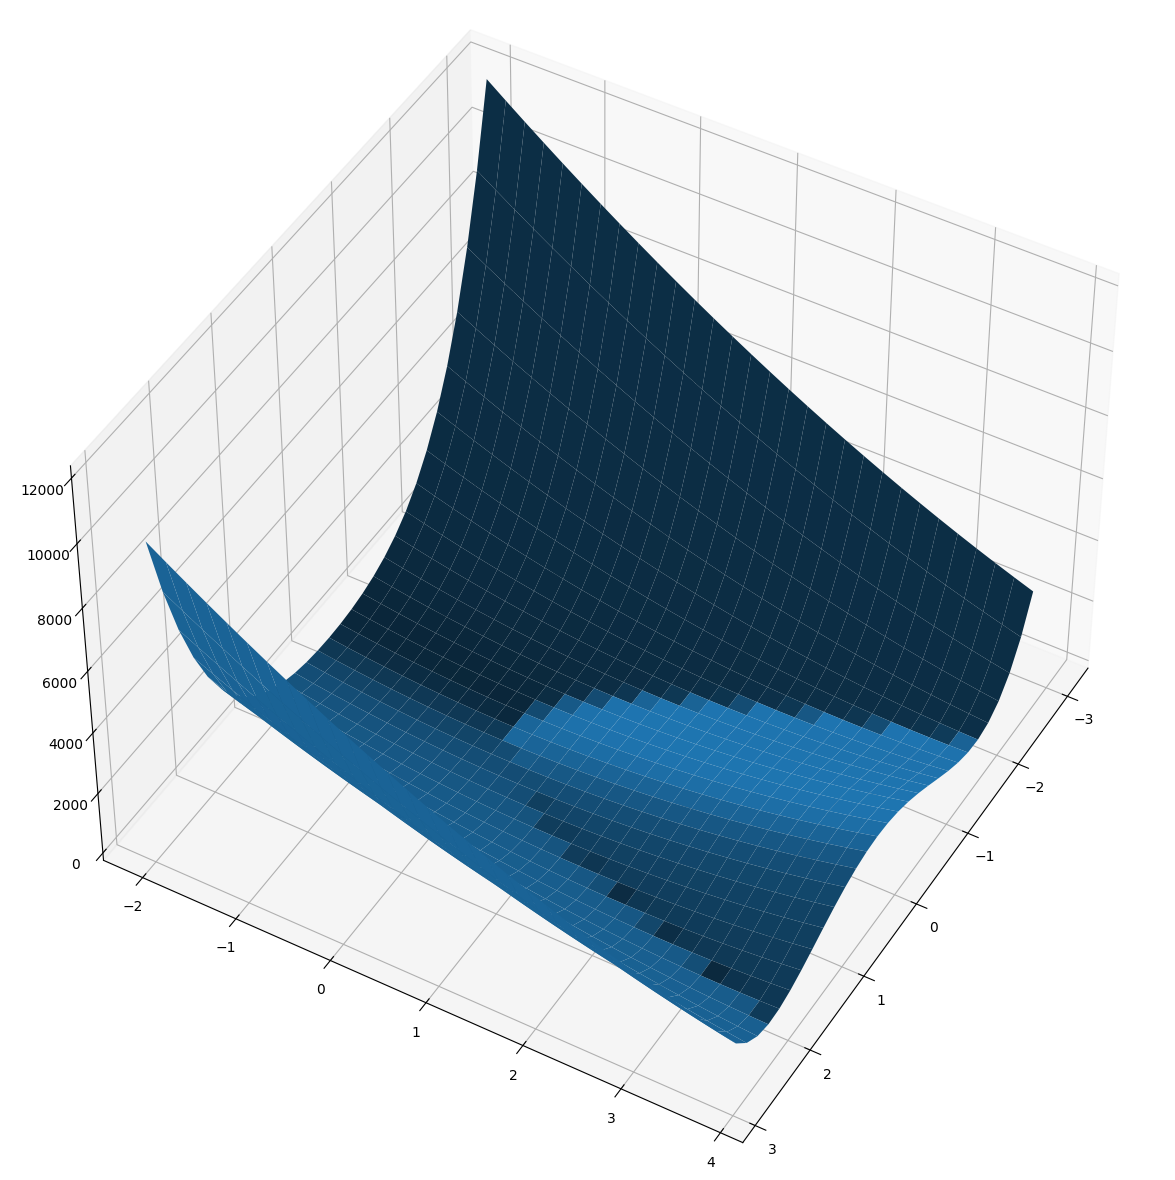

In [6]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Если внимательно посмотреть на график, можно увидеть долину параболической формы, о которой мы говорили ранее.

Теперь, когда нам доступно визуальное представление функции, давайте попробуем её оптимизировать. Начнём с простых методов.

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

In [7]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Итак, мы нашли точку минимума одним из методов. Теперь давайте используем для этого другой алгоритм.

Допустим, у нас есть некоторая точка x0 в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

In [8]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


→ Симплекс-метод является стандартным методом для решения задачи оптимизации, в которой есть функция и несколько ограничений, выраженных в виде неравенств. Неравенства определяют область в форме многоугольника, в одной из вершин которого обычно находится решение. Симплекс-метод представляет собой систематическую процедуру проверки вершин как возможных решений.

Задание 4.5

Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.

Для реализации этого алгоритма используется функция least_squares.

→ Мы используем этот метод, так как он хорошо подходит для задач безусловной оптимизации и считается методом первого выбора, если необходимо оптимизировать функцию, для которой нет ограничений.

В качестве ответа внесите в поля ниже координаты найденной точки в порядке их следования в коде (одно поле — одна координата). Ответ округлите до трёх знаков после точки-разделителя.

In [10]:
import numpy as np
from scipy.optimize import least_squares

# Определяем функцию Розенброка
def func_rosen(x):
    return np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)

# Используем least_squares для оптимизации функции
res = least_squares(func_rosen, x1)

# Результат
optimized_point = res.x
print("Оптимальная точка:", np.round(optimized_point, 3))


Оптимальная точка: [0.939 0.882 0.776 0.603 0.361]


5. Условные экстремумы. Метод Лагранжа

In [1]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

#Целевая функция для аргументов a и b :
#f =  3*a**2 + a + 5*b**2 + 4*b
#Функция ограничений:  a + b - 200 = 0
#Функция Лагранжа :
#3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
#df/da = 6*a + w + 1 = 0
#df/db = 10*b + w + 4 = 0
#df/dw = a + b - 200 = 0
#Стационарная точка M(x,y):
#125.1875 , 74.8125

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [2]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Фёдор\AppData\Local\Temp\ipykernel_55300\3823877321.py:9: SyntaxWarning: invalid escape sequence '\l'
  "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
